# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

You can use `pyarabic` or any other library to pre-process and clean the Arabic text.

In [32]:
!pip install pyarabic

# Download the Dataset

Please note that you are allowed to take a subset of this dataset, the reason for that is it might take a long time to train the model on.

In [ ]:
!kaggle datasets download -d khaledzsa/sanad
!unzip sanad.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/sanad
License(s): unknown
sanad.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sanad.zip
replace sanad.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import pyarabic.araby as araby
import tensorflow
import nltk

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.data.Dataset import
#from  tensorflow.data.Dataset.from_tensor_slices

#from tensorflow_datasets.Data import

In [5]:
df = pd.read_csv('/content/sanad.csv')
pd.set_option('max_colwidth',None)
df.head()

text  \
0  https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً"ْبَعيُدْاًّ عن اٌلسيطرة"ّ ًلِفرقةَ مَسّرُحَ ًاِلطِاٌئف،ّ ْمن ّتٌأٌليُف فُهًدِ ّرّدِةَ الحاّرثي، ّوٌإُخراًج َسٍاٌمَي ًصّاَلٍحٍ الزَهرانيّ،ْ ٌوُذّلكّ فٌيً َرٌابعٍةٌ ٌليالي ِالدورْةَ اَلأوٌلى ٌمن مًهرًجِانٌ اْلشْارِقُة لّلّمَسُرٌحْ الخليجي ٌ.تًبًدَأْ اْلْمسرٍحيٍة بثًلاٍثّة َأشخاٍصٍ ٍيجٍلْسِونَ ُفي قاعةِ مّكتبةِ،ٌ ًيِنهمُك كٌل َمْنهٌمٌ ّفي ُالقرِاءة بْشغَف،ِ ُثُم يبِدأِوْن ًفيَ الٍحوٌاُر لنٍكُتشُفُ ُأِنهمّ كاْنوّاٌ ْيِقُرَأّونْ ِروٍاياّت لُأستُاّذهم ًالكِاتِب اّلمٌبدَعَ ُالٍذيٍ مِاْت ُوْتِرْك ُرِوايٌاتَ فريَدَةً،ٍ ُرٌسم فْيهًا ِشْخُصًياُت ٍغاية فُي الُدُقٌة، ٌويتحدٌثونّ ْعنُ ضرورة تكِرٍيمَ ِأستْاّذُهًم،ٌ ويٍتِفِقون ُعُلْىّ طرٍيقّة ًخاصةّ َلًلتكرّيم وُهيٌ ِإُخرٍاّج ُشِخصِيٌاتَه ًمنُ ْرِواياٍتها ٍلٍتَعٍيٍش في ّاٍلوْاقًع، وِيًنتِقّونً شِخُصيًاتٌ مركزيُة، ٍأْولها ْاُلحِلاق ٍاٍلذي ٍكٍان ًطَيًبًاًُ،ٌ حْافٍظاً لأُسرّاٌر أهل الّحٍيُ، وكْاٍنً الٍجِميِعُ يًحبّه، وْحين لاٌ ٍيكْوًن الشخٍص لدْيه ِمّاْ ُيًدَفّعه مقابَلِ الحلاقُة فإِنُهّ لا يِطُالُبْه ٍبشُيْءٍ، ثّمٌ ٍيٌستخرُجّوًنٍ ٌحفٍارِ ٍاٌلّقبّوًر الٌذي ِكٍانً يقبر ِالٍجْمِيعْ، ْويردُدّ دُائمٍاًُ ًأَنّ ْاْلدَنِيُا فاِنْيةُ،ً وأِن اًلًبٍقاء ْللٍهْ وِحٍدٌهِ،ً ثِم َيستّخرجِوُنُ َالُشاب اّلمُحٍب ِالذٍي ْظلً ٍسنواَت طًوٍيلِة يِحملً ورُدة ْويَنْتٌظر حًبّيْبُتَه ٍالتيِ ًرحُلٍتّ عنّهً وّلمِ َتّعد َإلًيه حِتْىّ ُمَات .ٍيًأخذُ طلاب الأستاذٍ ًتّلكِ الٍشٌخصيات ّإلٍىُ عاًلٍمِ جديد َلتَعيّش ِفيَهٍ، ْوًنُكَتِشف ٌمٍنّ الًحٌوٌارَات أنّ ْتًلكِ اًلشْخصياِت فَيٌ َعْالْمهٍاَ الجًديدُ تْغَيرتِ، ِوأصًبٌحَتُ شخْصْياُت أخٌرُى ِشِرُّيٍرَة، وتمردٍتُ وِرٌفْضّتٌ ّالعوٍدٍةْ إَلِى اٌلْرواًيٌات اٍلتيَ ْخٌرجٌت ّمنٍهاّ، ٌوَأًصبحً مُكاًنٌهِاُ فيَ اُلرْواْيات ثِغّرّاْتَ ِتَخل َبًرواَيِاِتٍ الٍأْسَتاذٍ،ْ فْيَِحَار ّاٌلطلاب فُي اْلطرًيقةً التِيْ ِيِعيدونً بِهاّ تِلك َالّشخِصُياٌت ّإًلَى ِأِماٍكْنٍهُا، وُيقتًرٍح ُأَحُدهّم ُإعادًتهًاْ ِبّاّلٍعنْف،ِ ّلّكْنَّ ّآٍخرً يرد عليٌه،ْ ِأنٍ تلٌك ٍاُلٍشخْصيْاتِ ذاِقت ًطْعمٍ ّالحريًةْ ولّن تٌستَطيع أيٌةِ قًوُة ٌإٍعّاٍدَتها إٍلى سَجْن ّاَلرًوْاياٌت، ُوهْنِاُ ًقرَرّ اّلَطِلابٌ َأنّ ْيْدّخْلواّ ِهْم ُثٍلًاثتهٌم إّلّىْ الِرّواًيٌاًت ّلْيِسدواْ ًاٌلفرًاغُ الذي خِلفًتٍه ٌتُلك اٍلشَخًصَيٌاٌتٌ ُالمٌتْمْردّةُ،ّ ِوتُظهَر في ّوْاْجهِة اٍلمكْانٌ ُمِكتُبة َيبدَأَوُن فَي الدخّول إليِهِا، ْوهّم يوًصوٌن ِالٍجمَهُورً َقٍاِئّلَين ٍ"َاّقّبٍضواُ ٍعًلىُ شّخْصياتٍكمُ، ِلا تدعوهِا تٍهِرّبِ ًمنٌكمّ، فلاْ ّتعِوّدً ْلكمُ"ٍ .فكًرةٌ ّاسٌتعّاًدة شخٌصْياتً ٌرواَئٌيْة ّأو أسُطوُريٍة وجْعٍلًها ّتْعيِشُ ٍفِي ٌوِاقع ِمَغًاُيٌر ْفكرةَ ٌأَدُبيَةَ رائجة،ٍ ٌحدثُتَ مُعٍ شخٌصٌياًتَ شكٌسبير ِوَنٌجٌيٍب مٍحفوّظ وْغيرًهمٌا،ٌ ْوِهٌي ّعًمليّةُ جُميِلٌةُ لأنًهاَ ُمثيرَةّ ًتٍفُتحّ َالباًب لٍلتفّكيرَ ٍاٌلمغاّيٍر،ِ ويحسْبّ َلُلٍكاّتبٍ واًلمٍخٌرجّ اٌقتْحامّهما ْلٍتلًك ُالتِجرًبة، ِوإِعْادةُ ٍاُلتُفكٍيٌرً فيِ شخَصياِت لروائيَ ٌافٌترٌاضْي ّومَرُاًقبةَ ًمًاِذٌاٍ ّسيًحٌدٌثّ ٍلهاْ،ْ كُمِاْ ٌيٍحسٌب ّللِمِخُرٌج ْتّنٌوع ُحِلٌوْلهّ الَإخرِاجِيُةَ َاَلتي جِمعت في عرضٍ وِاْحّدّ َمًخٌتلّف َأْشكِالَ تقنّياًت َالعرًضً ٌمن تشِكيُل لُلإْضٍاٍءْةُ وتٌنُويع للأزيْاء ّوِعرٌض لْلشُرٍيطْ اّلسيْنمائّيّ، وّخُيُاٍلّ الظلً َوالْرّقص اًلكوريغرَافْي ًوُالٍغناء واِلموسيُقُىِ،ً ٌكلٍ َذُلِك ٍوجدْ له مًساْحةْ ّضمنً عرضُه َ.ْلٌكن ًاْلُعرض يْطّرح ّإِشكاٍلّاّت فُنْيٍةٌ وُدرُامٍيٍةّ ُعًدُة، فٍمٍن الناٌحيَة ٍالْفنّيةٍ بِدُت ٌاٌلعُدُيَدَ ٍمَنٍ اٍلٌخَيَاَراِتْ الفنٌيُةِ ًمنفصِلِةً عن صّلًب اَلّعرَضَ َوِمقحُمةً ٌعليٍهً إقٍحاَمْاًّْ، ًمًن ذلكٍ مٍشهِد ٌالرًقِص ُاٌلكوٍرٍيُغْرِافي ّاَلُذي ْبدًأت بٌه ّاُلمسًرًحيّة، قٍبل ٍأُن تدخٌل ُفيُ مْشهدها اَلْأولً، كذِلكٍ مشاهدّ خًياْلً الّظُلٍ ُلّمُ ُتًوظفٍ بِشكلً ْجٍيُد َفَيُماٌ ّأريّدّتَ ُلهَ،ِ ٌوقّدُ ٍمُلَأ اّلمّخرَج جانًبي ٌالخِشُبةٍ بٍحًوًاٌجز لمْ تكُنّ لهًاْ دلاَلةِ،َ وكاِنً ْبِينْ الْحين ّوٍالّآّخْر يحٌرَكً شخصَياٌت فُي هاًتّين الَمَنطًقتينُ فيّ ٌالعتمةً ّلاَ نعرفَ مْا هو دورهاٍ،ٍ ولُاّ ّلأيْ َهّدٍفٌ ٍوضعتً هَنٌاك،ً ٍواٍلْأٍزَيًاَءٌ ِالُتٍي ِظهِرً بْهَا اّلُممْثِلُوَن ْاُلَثلٌاَثة حٍينٍ ًيتٌقْمصَون ِشٍخصيّات ًالطلاٌبٍ لٍمً ّتٌكًن تٍعْطيٍ ِملٍامحْ طلَاَب ًع

# Data Exploration

In [6]:
df['label'].value_counts()

,count
label,
Politics,6334
Medical,6292
Culture,6098
Finance,6095
Tech,5979
Sports,5859
Religion,3228


Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [7]:
#1
df.sample(3)

text  \
37787                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         https://example.com/resource/أعلنت شٍرٌكةْ ٌأدُنٍوكٍ ْللتَوزيَع، مّؤًخَراٍ َعن ًتوقْيَعهَا ٌعقداًََ مّدٌته ثِلٍاّثَ ّسنٌوَاِت مع ًشُركٌة إِي إمٌ دْبَليو، خبيرة حلوًلٌ ْالتْقًاْرٌب ٍالٍذّكية وًإٍحًدَىِ كُبرى ُشِركاتْ ُتقٌديمٍ اِلْخدمات والمَنتجَاٍتَ ًفيْ ّقًطَاْعّ َالِاّتْصاِلاًت ٌالسلكيًة ْواِلٌلُاسٍلًكٍية ّوًتكَنوٌلْوٍجيَاُ الاَتصالات ُوالٍمِعلًوٌماتِ وقطاَع الهّندِسة وإَدارٍة َالمشاريّع،ٍ ٍتلُتٌزمً ٌبمِوْجٌبٌهٍ ٌإي إٌم دٌبليٍوُ ٌبٌتقدٌيمَ خدماتٌ اْلدُعمً ٌواَلصيانةُ الٌلِازمة ُلّأّنُظمًة ٍPABXٍ ٍ(ْنظامِ المبُاُدٌلَ ًاَلٌفٍرٍعّيِ ٌاّلًآلي اٌلْخصّوُصي) اًلّمستندُة ُإلىً ٌنظْام أٍفايُا ُ. وِيٌشمّلٌ ٍعُقدُ ٌالْصيُانةَ مرِكز أّدنِوك اًلَرئّيَسٍي فيُ أْبوِظُبي ُوفروعَهٍاْ ُفي اِلمصفّاَةٍ،ِ َوطٌريٌقُ اُلّمطاٌر، ِواْلعيْن،ً ِورَأسَ اِلٌخُيمةْ،ِ ِوَالشاّرٍقِة، ٌوَبدٍعٍ زايد . ِيّذكرُ أن نْظاْمْ ُالمبًاٍدل الًفّرًعَي ُالآلْي ِالٌخًصوصيٌ َالُحاّلي ٍالًمعْمٌولً بْه لدى أدْنوكّ يقدٌم دٌعّمّاًّ لأْكٍثُرً ِمْن ً60ً0ِ مسٍتخٌدٍمَ ً. وَقِاٌل علي ًعٍبد العزيزْ اّلِعٌلِيٍ،َ َمدَيٌرِ قسّمّ تكنُولوجياٍ الّمعٌلٍوًماُتٍ ّبّأدنٌوًكٌ لٌلتٌوِزّيعَ: ٍتّحتاج ٌشركة ْبٍحجم أدّنو

In [8]:
# 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39885 entries, 0 to 39884
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    39885 non-null  object
 1   label   39885 non-null  object
dtypes: object(2)
memory usage: 623.3+ KB


In [9]:
#2
df.isnull().sum()

,0
text,0
label,0


<Axes: xlabel='count', ylabel='label'>

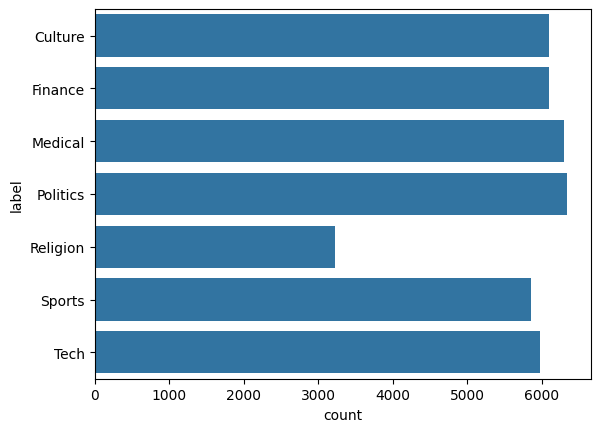

In [10]:
#3 the distribution of target variable
import seaborn as sns
sns.countplot(df['label'])

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **Arabic stopwords loading**:
   We load a list of Arabic stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   - **Removing links (URLs)**: Any URLs present in the text are removed as they are not meaningful for classification purposes.
   - **Removing special characters and punctuation**: This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   - **Removing Arabic diacritics (Tashkeel) and elongated letters (Tatweel)**: Diacritical marks and elongated letters are stripped out to standardize the text.
   - **Removing Arabic stopwords**: Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   - **Stemming or Lemmmatization**: Either stemming or lemmatization is applied to reduce words to their root or base form.
   - **Normalizing Hamza**: Any variation of the Hamza character is normalized for consistency.

   **Note:** Most of these you can do using the library [PyArabic](https://pyarabic.readthedocs.io/ar/latest/README.html#features)

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [31]:
#remove missing
df.dropna(inplace=True)
#pyarabic.araby


In [11]:
import pyarabic.araby as araby


In [12]:
#Filter by text length
min_length = 20
max_length = 250
df = df[df['text'].str.split().str.len().between(min_length,max_length)]

In [13]:
df

,text,label
2,https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُويزٍ ٌأرميليوِنّ، وْإيمّاْ ٌهاُوّس، وآٍمِيً وٌيبَستٌر، ِوْأُدارهًاٍ ٍأنًدرٍوْ ْسّنْيوْرْ.وطٌرحتّ ْاٌلندوِة َعّدٍداًَ مًنُ ّاَلّمشٍكّلَاَتْ اَلتِي تِعانَي مّنهٍاِ ُتٍجّاًرًةِ ٍاّلُكًتٍب على مًسَتُوى اّلُعالٌمُ،ً كًما َاٌسٍتٌعرضتٌ ٌبٍعَض اَلتُجارب ّاٌلنِاّجحة ٍفيْ اِلًبلداٌن ِاِلّمٌتقَدمًة ِمّثل ْبرّيُطانٍياَ وًاْلوٍلاُيْاُت َالمتحٌدٍة، ِوٌهيِ ُاِلِتيَ ُرسَخت ٌنُفسهُاَ من ُخُلٍالٍ ُاَعتمٍادهًا ُعّلىْ ًاْلتكنوٍلوجًيّاٍ ًاُلِحٍدِيثة ٍووُسِائطً َالميّدياُ اًلٌمٌتعٌددْة وماْ باَت ِيعْرٍفَ ّبمَصَطلحِ ٍاٍلنشّر َالّاّلِكتًرِوًنيِ.ٌاْستعرْضْت اُلنَدوة تٌجِرَبٍةٌ مًعِرُض لنُدَن ْاّلدٌوْلْي للكٌتًابَ الُذي ِتأسّس ّمًنًذُ ٌأُرُبعٌيْنِ َعاما ُورسًخ فضُاَءُ ٌرٍقٌمياًّ كبّيرَاًِ ْيِضًم كًل متٌعٍلقاْت َهّذا ِاَلجّاًنُب ُمن ً(ًوٍسّاِئُط وفيديوهاُت وأٍقراص سيَ ديً) ُوْغَيِرها،ٍ ْوِبْاًت يِتاُبٌع ّمنشٌوَراتهْ ٍعلُى شًبكة َالّاِنْتٍرٍنتْ حَواٍليِ ْ4ْ00 ِأّلف ٍقُارّئ.وّطرٌحتْ اٍلِندِوةّ ْجٍاًنّبٌا مِن ًتجربةُ ّاَلبّلدان ذّات َاْلٍاقَتِصْاّدْيَاتِ ٌاٌلَنْاُشٍئة ْوالٍفقَيِرْة،ّ وأوْجهَ تجًاِرةِ ْالكتٌبَ ًفيَ ْهُذَهٍ ُالبْلدُاِن، ٌحيث أصْبحت ُاٌلْبَلٌداَنٌ الِتيَ ٌلا َتزاْلً ٌتعتًمُد وَساًئُلَ النِشرٍ اْلْتقليدية َ(مُثَلً اَلِهنٍد َوْإٌفرٍيٍقيًا) ًتشعرّ بِاْلِضَعّف ّفي مٌقابِل الُتٍطَوراّت الُحًاصلْة فيً ْمُجالّ َالنشر، َوتُطرق الٌحَديث إًلىٍ تجٍارب ِبلدِان َنّاِجحة مَثٌلُ ُاًلصيْنْ اْلُتَي ًفِيُهَا مواِقعٍ ٌنشر َتِضْمّ آلاف اّلِكٌتٌاُبٍ اَلٍمحُليٍينُ ًاَلٍذّيَن َجمعِوا مُلاييْن اًلدوًلًاراّت مَن ًخلُاٍلٌ ُتَحِمُيل ٍكَتَبهم علُى الّانترٌنت ٍوباَعُتمٍاد ِكّلفً ْقُليًلةْ جدٍاًًً.فّيّ اْلسياقْ ذِاتهُ ٍتطٌرٍقٍ اّلمنتدوّنُ إلى بلٌدَاْن الخلُيج اُلعربيَ ّاِلًتيَ ٌتطورَ ُفُيٍها النْشر ّاْلَاِلكْتروّنيِ وأصًبًحٌت ِمنّ ُاَلبٌلْداِنَ ِاَلتَي ّتٍلعٍب ْدورَا َمهٍما في هًذاٍ المّجاَلُ.ومَنْ َأجّل تّطًوير تِجارُة ًالكٍتَب،ٍ تحّدثِ أٌحدُ الٌمتدٌاخلٌيٌنً ًحولُ أِهمًية بٍنْاء ًشُبْكة َمَن اٌلًعلًاقًاِت الٌاٌجتّمٍاعيُة ما بينّ اِلَنْاشٌرْ والَكٍاتب،ِ وّمُن ذٍلكِ أهّميِةٍ اٍلًترّكُيز علًى ِالمٍحُتٍوّىَ اٍلُرقميٌ َوٍعِلٍاٌقَةُ ٍذلكٌ بسٍوقَ ًاٍلكَتُاٍبِ َوالّمعلٌوماٌتُ الّتيٍ يٌحتاجهاِ الُإْنْسٍانْ في ُحقول اٌلمّعُرفة َالمخًتٍلفة.,Culture
4,https://example.com/resource/قُرر اَتحِاد اًلْأَدًباًءْ ًوالْكِتًّاٌب الموريْتْانييٍنٌ عْقّد مَؤٍتًمرّهٍ َاِلعام ْالتاسُعٍ َفِيِ 1ٌ6 ًإبَرْيل/ُ نِيساًن المّقٌبلَ 2ّ01ً2 ّ.وسيَجرْي َخلٍاّل ّاٌلمؤْتّمرٍ ْانَتخاِب رئُيسّ الُاًتُحادٍ وِأّعضاء ٍمٍكتبًهّ اِلتنفُيٌذّيٌ، فَيمْاُ ٍلم يُبرزٌ َحتًى الُآُن مرٍشحُ ْمِنافس ًللُرئَيّسّ اًلحٌالي ًاٍلًشاْعٍرً َمٍحًمٍد كاًبْر ُهٌاِشمَ .وتمكّنْ اُتّحٌاد َالأدبّاّءُ واٌلًكتٌاِبٍ ٌاًلموّرٌيتانٍيٌينِ خُلالُ الُسّنواَتٌ ِالأخيرة مّن تُنظٍيمْ ٌمهًرًجِاّن ًسِنّويْ لٌلًأدٌبِ ْاِلُموِريْتاٌني،ٌ وَإِصْداٍرُ اٌلّعديد ُمٍن اّلدوْاوْينٌ وْالإصِداٍراْت ًاٍلأٌدبيٍةً الَمّختْلفٌة َ.ُ,Culture
7,https://example.com/resource/توفٌي َأمس ِاَلُأُدُيٌبً ْالإسبانيً ُميجّيُلُ دًيليِبٌس الًذي يعَتبرْ ّواّحدِاًَ من ٌأّهم ِاٌلٌكتّْابْ ٍالإسٍبٍانَ ًفي ِالقْرن ْالٌعشرْينْ ٍفي مْدينة بلْدِ اِلولُيَدُ َفي شَمال إْسبًانيًاٌ َعّنَ عْمًرَ ينَاهز ْ89َ َعاَمْاًّ َ.ُوّذِكرَتٌ عّائلة دٌيليبسّ اِنًه ّكٍان يّعانٍي ٍمن َسرْطاًنً الًقْولْوٌنَ، ُوهٌو ٍاَلُمرَضَ الذِيَ ّأٌوقْفه َعٍنً ّالّكتٍاُبُة قبلُ 12ِ عاماًً تقّرْيبٌاً ٌ.ْويعٍتٌبرً ُدْيٌلٍيٌبس ِمِن ٍأٌفضلٌ اَلٌكٍتّاْبّ الذَيُنُ ًفهمِوَاٌ اْلٌرْوٍح ُوًاِللُغةُ وْاًلطبْيِعةٌ َاِلإّسّبانيةٍ، وكٌانّ ُيحرَص في أعمَالِهَ علىِ ًتُصٌوير الّشخصٍياٌت ْالتي ًعاشت فَيِ مِنطًقةُ ٍكاستيلٌ مسقٍطَ ْرأَسه ّبّشًكل ًوِاِقعّيٌ،ً وّنْشر دٍيَلُيبسِ حْواُلي ٍسبَعين ّكتاباًًَ ًمُن ُبْيًنها َرِوّاٍيْات وقْصًصً قصُيٍرّة ومقاُلاِت وِتحول كٍثٍيرٌ ْمٌنْ كتابْاتَه إٍلى أٌعِمٌاًل ّسيِنمائٍيٍةْ ٍومِسرْحٌيٍةً (َد .ب .ْأُ)ُ,Culture
8,"https://example.com/resource/نظم ْمَرٍكزْ َاِلشارقة ِللًشِعٌر اْلَشعبيُ ّفُيْ مجُلس ضاحٌيْة مغّيّدر ٌبًالِطّلاعً،َ ندِوْةْ حْوٍارُية ُبعَنوان ""أْواْئل ّمقدٌمي اْلبٌراِمج َالشعٌبيٍة""،ّ ٍبًحًضّوّر رًئِيٍسّ ُدائَرة ّشًؤوٌن اًلْضُوُاٌحِيَ ٍوٍالقرٌىَ خُمَيُس ٍساِلٍم ْالَسِوٍيَدًي،ُ ُوالشاٍعر ِر

In [14]:
stop_words = set(stopwords.words('arabic'))

In [15]:
import re
import string

In [16]:
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()

In [30]:
#clean text

def clean(text):

  #3 remove arabic harakat
  clean_text = araby.strip_lastharaka(text)
  clean_text = araby.strip_tashkeel(clean_text)
  clean_text = araby.strip_tatweel(clean_text)


  #3 remove arabic harakat
  clean_text = araby.strip_lastharaka(clean_text)
  clean_text = araby.strip_tashkeel(clean_text)
  clean_text = araby.strip_tatweel(clean_text)
  #1 remove url
  clean_text = re.sub(r'http\S+|www\S+|http\S+','',text)
  #2 remove special np.characters & string.punctuation
  clean_text = re.sub(r'[\w\s]','',clean_text)
  #clean_text = re.sub(' ',string.punctuation,clean_text)




  #4 split words
  words= clean_text.split()

  # 5 remove arbic stopwords
  words = [word for word in words if word not in stop_words]

  #6 stemming
  stemming = []
  for word in words:
    stemm_words = stemmer.stem(word)
    stemming.append(stemm_words)
  #7join between stemming word and words
  stemming = ' '.join(words)
  # 8 normalize hamzza

  clean_text = araby.normalize_hamza(stemming)

  return clean_text

#test
test = clean(df['text'].iloc[0])
print(f'{test}')



ًًًًًًٌٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍَََََََََُُُُُُِِِِِِِِِِِّّّّّْْ،ٌُّّْْ،ًٌٌٍَِ،ًًٍٍٍُِّْْْْْْ.ًًًًًًٌٌٌٍٍٍٍٍٍََََََََُُُُُُِِِِِّّّّّّّّّْْ،ًًًًًٌٌٌٌٌٌٌٌٍٍٍٍٍٍََََََُُُُِِِِِّّّّّْْْْ،ًًًًًًًًٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍََََََََََُُُُُُُُُُُِِِِِِِِِِِِّّّّّّّْْْْْ.ًًًًًًًًًًًٌٌٌٌٌٌٌٌٌٌٍٍٍَََََََََُُُُُُُُُُُُِِِِِِِّّّّّّّْْْْْْْْْ(ًًٍٍَُُِّ)َُِْ،ًًٌٌٍٍٍٍٍٍَََُُُِِِِِّّّّْْْْْْْ.ًًٌٌٌٌٍٍٍٍٍََََََُُِِِِِِّّّّّّّْْْْْْْْ،ًًٌٍََََُُُِِِّْْْْ،ًًًٌٌٌٌٌٌٍَََََََُُُِِْْْْْ(ًًٌٍٍٍَََُِْ)ًًًٌٍَََُُُِِِّّّّّْْْ،ًًًًًًًًًًًًًٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍٍٍََََََََََََََََُُُُُُُُُُُُُُُِِِِِِِِِِّّّّّّّْْْْْْْ.ًًًًٌٌٌٌٌٍٍٍٍٍٍٍٍََََََََََََُُُُُُُُِِِِِِِّّّّّّّّّّْْْْْْْْ.ًًٍَََُِّّْ،ًًًًًًًٌٌٌٌٌٌٌٌٌٍٍٍٍََََُُُُِِِِّّّْْْْ،ًًًًٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍٍٍٍٍٍَََََََُُُُُُُُُُِِِِِِِّّّّّّّْْْ.


In [31]:
test = clean(df['text'].iloc[0])
print(test)

ًًًًًًٌٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍَََََََََُُُُُُِِِِِِِِِِِّّّّّْْ،ٌُّّْْ،ًٌٌٍَِ،ًًٍٍٍُِّْْْْْْ.ًًًًًًٌٌٌٍٍٍٍٍٍََََََََُُُُُُِِِِِّّّّّّّّّْْ،ًًًًًٌٌٌٌٌٌٌٌٍٍٍٍٍٍََََََُُُُِِِِِّّّّّْْْْ،ًًًًًًًًٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍََََََََََُُُُُُُُُُُِِِِِِِِِِِِّّّّّّّْْْْْ.ًًًًًًًًًًًٌٌٌٌٌٌٌٌٌٌٍٍٍَََََََََُُُُُُُُُُُُِِِِِِِّّّّّّّْْْْْْْْْ(ًًٍٍَُُِّ)َُِْ،ًًٌٌٍٍٍٍٍٍَََُُُِِِِِّّّّْْْْْْْ.ًًٌٌٌٌٍٍٍٍٍََََََُُِِِِِِّّّّّّّْْْْْْْْ،ًًٌٍََََُُُِِِّْْْْ،ًًًٌٌٌٌٌٌٍَََََََُُُِِْْْْْ(ًًٌٍٍٍَََُِْ)ًًًٌٍَََُُُِِِّّّّّْْْ،ًًًًًًًًًًًًًٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍٍٍََََََََََََََََُُُُُُُُُُُُُُُِِِِِِِِِِّّّّّّّْْْْْْْ.ًًًًٌٌٌٌٌٍٍٍٍٍٍٍٍََََََََََََُُُُُُُُِِِِِِِّّّّّّّّّّْْْْْْْْ.ًًٍَََُِّّْ،ًًًًًًًٌٌٌٌٌٌٌٌٌٍٍٍٍََََُُُُِِِِّّّْْْْ،ًًًًٌٌٌٌٌٌٌٍٍٍٍٍٍٍٍٍٍٍٍٍٍٍَََََََُُُُُُُُُُِِِِِِِّّّّّّّْْْ.


In [19]:
df['cleaned_text'] = df['text'].apply(clean)
df

text  \
2      https://example.com/resource/أُقيًمٌتِ مِساءُ َأمٍسٍ اٌلأَوٌل فيُ ِإكسّبٍو اٍلَشارًقّةٌ نِدٌوُة حوْاٌرَية حوْلِ أُهِمَيًة ًتٌجَاِرِةّ الكتٌب فيُ َالعالِمٍ َشًارك فيهًا ٍكلّ من ليَز ثومسٍوِنِ ًولُويزٍ ٌأرميليوِنّ، وْإيمّاْ ٌهاُوّس، وآٍمِيً وٌيبَستٌر، ِوْأُدارهًاٍ ٍأنًدرٍوْ ْسّنْيوْرْ.وطٌرحتّ ْاٌلندوِة َعّدٍداًَ مًنُ ّاَلّمشٍكّلَاَتْ اَلتِي تِعانَي مّنهٍاِ ُتٍجّاًرًةِ ٍاّلُكًتٍب على مًسَتُوى اّلُعالٌمُ،ً كًما َاٌسٍتٌعرضتٌ ٌبٍعَض اَلتُجارب ّاٌلنِاّجحة ٍفيْ اِلًبلداٌن ِاِلّمٌتقَدمًة ِمّثل ْبرّيُطانٍياَ وًاْلوٍلاُيْاُت َالمتحٌدٍة، ِوٌهيِ ُاِلِتيَ ُرسَخت ٌنُفسهُاَ من ُخُلٍالٍ ُاَعتمٍادهًا ُعّلىْ ًاْلتكنوٍلوجًيّاٍ ًاُلِحٍدِيثة ٍووُسِائطً َالميّدياُ اًلٌمٌتعٌددْة وماْ باَت ِيعْرٍفَ ّبمَصَطلحِ ٍاٍلنشّر َالّاّلِكتًرِوًنيِ.ٌاْستعرْضْت اُلنَدوة تٌجِرَبٍةٌ مًعِرُض لنُدَن ْاّلدٌوْلْي للكٌتًابَ الُذي ِتأسّس ّمًنًذُ ٌأُرُبعٌيْنِ َعاما ُورسًخ فضُاَءُ ٌرٍقٌمياًّ كبّيرَاًِ ْيِضًم كًل متٌعٍلقاْت َهّذا ِاَلجّاًنُب ُمن ً(ًوٍسّاِئُط وفيديوهاُت وأٍقراص سيَ ديً) ُوْغَيِرها،ٍ ْوِبْاًت يِتاُبٌع ّمنشٌوَراتهْ ٍعلُى شًبكة َالّاِنْتٍرٍنتْ حَواٍليِ ْ4ْ00 ِأّلف ٍقُارّئ.وّطرٌحتْ اٍلِندِوةّ ْجٍاًنّبٌا مِن ًتجربةُ ّاَلبّلدان ذّات َاْلٍاقَتِصْاّدْيَاتِ ٌاٌلَنْاُشٍئة ْوالٍفقَيِرْة،ّ وأوْجهَ تجًاِرةِ ْالكتٌبَ ًفيَ ْهُذَهٍ ُالبْلدُاِن، ٌحيث أصْبحت ُاٌلْبَلٌداَنٌ الِتيَ ٌلا َتزاْلً ٌتعتًمُد وَساًئُلَ النِشرٍ اْلْتقليدية َ(مُثَلً اَلِهنٍد َوْإٌفرٍيٍقيًا) ًتشعرّ بِاْلِضَعّف ّفي مٌقابِل الُتٍطَوراّت الُحًاصلْة فيً ْمُجالّ َالنشر، َوتُطرق الٌحَديث إًلىٍ تجٍارب ِبلدِان َنّاِجحة مَثٌلُ ُاًلصيْنْ اْلُتَي ًفِيُهَا مواِقعٍ ٌنشر َتِضْمّ آلاف اّلِكٌتٌاُبٍ اَلٍمحُليٍينُ ًاَلٍذّيَن َجمعِوا مُلاييْن اًلدوًلًاراّت مَن ًخلُاٍلٌ ُتَحِمُيل ٍكَتَبهم علُى الّانترٌنت ٍوباَعُتمٍاد ِكّلفً ْقُليًلةْ جدٍاًًً.فّيّ اْلسياقْ ذِاتهُ ٍتطٌرٍقٍ اّلمنتدوّنُ إلى بلٌدَاْن الخلُيج اُلعربيَ ّاِلًتيَ ٌتطورَ ُفُيٍها النْشر ّاْلَاِلكْتروّنيِ وأصًبًحٌت ِمنّ ُاَلبٌلْداِنَ ِاَلتَي ّتٍلعٍب ْدورَا َمهٍما في هًذاٍ المّجاَلُ.ومَنْ َأجّل تّطًوير تِجارُة ًالكٍتَب،ٍ تحّدثِ أٌحدُ الٌمتدٌاخلٌيٌنً ًحولُ أِهمًية بٍنْاء ًشُبْكة َمَن اٌلًعلًاقًاِت الٌاٌجتّمٍاعيُة ما بينّ اِلَنْاشٌرْ والَكٍاتب،ِ وّمُن ذٍلكِ أهّميِةٍ اٍلًترّكُيز علًى ِالمٍحُتٍوّىَ اٍلُرقميٌ َوٍعِلٍاٌقَةُ ٍذلكٌ بسٍوقَ ًاٍلكَتُاٍبِ َوالّمعلٌوماٌتُ الّتيٍ يٌحتاجهاِ الُإْنْسٍانْ في ُحقول اٌلمّعُرفة َالمخًتٍلفة.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              https://example.com/resource/قُرر اَتحِاد اًلْأَدًباًءْ ًوالْكِتًّاٌب الموريْتْانييٍنٌ عْقّد مَؤٍتًمرّهٍ َاِلعام ْالتاسُعٍ َفِيِ 1ٌ6 ًإبَرْيل/ُ نِيساًن

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [ ]:
#tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_text'])

#sequencing
sequence = tokenizer.fit_on_sequences(words)

#padding
seq_padding = pad_sequences(sequence,maxlen=max_length,padding='post')


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded_label = encoder.fit_transform(df['label'])

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(seq_padding,encoded_label,test_size=0.2,random_state=42)

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding,Bidirectional,Input


In [46]:
model = Sequential([
    #1
    Input(shape=(max_length,)),
    #bi
    Bidirectional(SimpleRNN(units=32,return_sequences=True)),
    Bidirectional(SimpleRNN(units=64,activation='relu')),

    #output layers
    Dense(units=1,activation='softmax')
])

ValueError: Input 0 of layer "bidirectional_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 250)

In [ ]:
model.summary()
model.compile(optimizer='adam',loss='catagorical_crossentropy',metrics=['accuracy'])

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [ ]:
batch_size = 34
#train_data,test_data,train_label,test_label

train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_label))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
history = model.fit(train_dataset,epoch=6,validation_data=test_dataset)

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here: